In [32]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import *

In [33]:
outputpath = '/scratch/usr/hbkoziel/Arc12/pybins/'

outfile = outputpath+'BSO_DSI.npy'
DATA = np.load(outfile, allow_pickle=True, fix_imports=True)

outfile = outputpath+'BSOdepth.npy'
depth = np.load(outfile, allow_pickle=True, fix_imports=True)

outfile = outputpath+'BSOlonlat.npy'
lonlat = np.load(outfile, allow_pickle=True, fix_imports=True)

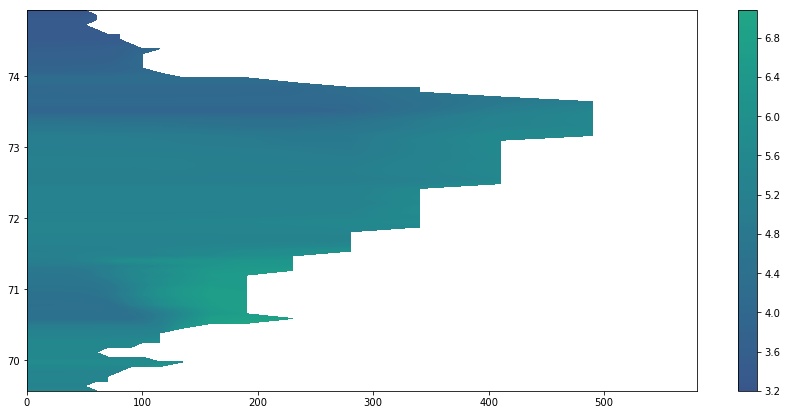

In [34]:
fig, ax = plt.subplots(1,1, figsize=(15,7))
p = ax.contourf(depth,lonlat[:,1],DATA[:,:,0],100,vmin=0,vmax=12)
fig.colorbar(p, ax=ax)

In [35]:
DATA.shape

(80, 21, 432)

In [36]:
DATA[:,:,1]

array([[ 5.90318727,  5.89643335,  5.86321163, ...,         nan,
                nan,         nan],
       [ 5.28316259,  5.28321075,  5.28331137, ...,         nan,
                nan,         nan],
       [ 5.47322226,  5.47323847,  5.4735136 , ...,         nan,
                nan,         nan],
       ..., 
       [ 3.17450953,  3.17172623,  3.16766047, ...,         nan,
                nan,         nan],
       [ 3.11753702,  3.11789083,  3.11837769, ...,         nan,
                nan,         nan],
       [ 3.12183833,  3.12233996,  3.12263799, ...,         nan,
                nan,         nan]])

In [37]:
DATA_50_500m = np.nanmean(np.nanmean(DATA[:,5:,:],axis=1),axis=0)
DATA_0_50m = np.nanmean(np.nanmean(DATA[:,:5,:],axis=1),axis=0)
DATA_alldepth = np.nanmean(np.nanmean(DATA[:,:,:],axis=1),axis=0)

/home/hbkoziel/.conda/envs/pyfesom-docs/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [38]:
base = datetime.datetime(1980, 1, 1)
date = np.array([base +relativedelta(months=+i) for i in xrange(432)])

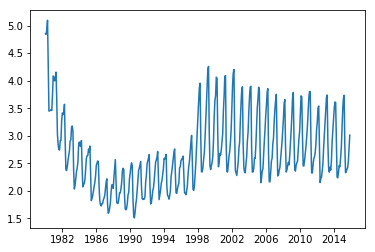

In [39]:
plt.plot(date,DATA_alldepth)

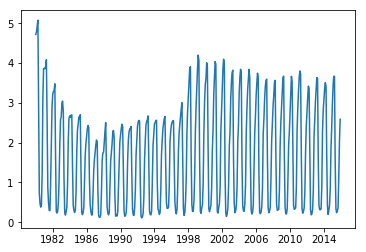

In [40]:
plt.plot(date,DATA_0_50m)

(432,)


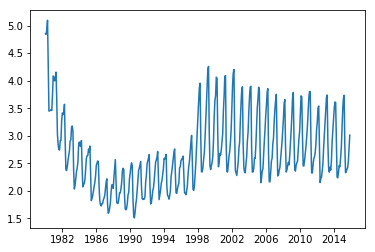

In [41]:
plt.plot(date,DATA_alldepth)
print DATA_0_50m.shape

In [42]:
import pandas as pd
data = np.array([DATA_0_50m,DATA_50_500m,DATA_alldepth])
print data.shape
data = np.transpose(data)
print data.shape

(3, 432)
(432, 3)


In [43]:
df = pd.DataFrame(data=data, index=date, columns=["DIN_0_50m", "DIN_50_500m", "DIN_ALL_DEPTHS"])
df.index.name='time'

In [44]:
df.head()

,DIN_0_50m,DIN_50_500m,DIN_ALL_DEPTHS
time,,,
1980-01-01,4.718152,4.919092,4.852011
1980-02-01,4.787200,4.870354,4.841335
1980-03-01,4.920620,4.936195,4.933035
1980-04-01,5.075356,5.110986,5.097515
1980-05-01,2.973359,5.027831,4.216997


In [45]:
df.to_csv('/home/hbkoziel/pyfesom/data/BSO_nuts/BSO_DIN_model.csv', index=True)

In [47]:
df2 = pd.read_csv('/home/hbkoziel/pyfesom/data/BSO_nuts/BSO_DIN_model.csv', header=0, sep = ',',na_values=[''], decimal=".", index_col='time', parse_dates=True)
df2.head()

,DIN_0_50m,DIN_50_500m,DIN_ALL_DEPTHS
time,,,
1980-01-01,7.858942,8.320708,8.168765
1980-02-01,8.169571,8.380021,8.308295
1980-03-01,8.598617,8.644801,8.643616
1980-04-01,9.089741,9.084117,9.106010
1980-05-01,5.776280,9.166707,7.874260
